In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as wb

In [52]:
data = wb.DataReader('GOOGL', data_source='yahoo', start='2014-1-1')

In [53]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,559.434448,554.684692,558.288269,557.117126,3639100.0,557.117126
2014-01-03,559.024048,553.018005,558.058044,553.053040,3330000.0,553.053040
2014-01-06,559.989990,553.773804,557.062073,559.219238,3535000.0,559.219238
2014-01-07,570.415405,561.141113,563.063049,570.000000,5100000.0,570.000000
2014-01-08,574.234253,567.212219,573.573547,571.186157,4480500.0,571.186157


In [54]:
#This selects the 'Adj Close' column
close = data['Adj Close']
#This converts the date strings in the index into pandas datetime format:
close.index = pd.to_datetime(close.index)
close

Date
2014-01-02     557.117126
2014-01-03     553.053040
2014-01-06     559.219238
2014-01-07     570.000000
2014-01-08     571.186157
                 ...     
2020-10-12    1564.589966
2020-10-13    1567.069946
2020-10-14    1563.439941
2020-10-15    1555.469971
2020-10-16    1567.699951
Name: Adj Close, Length: 1711, dtype: float64

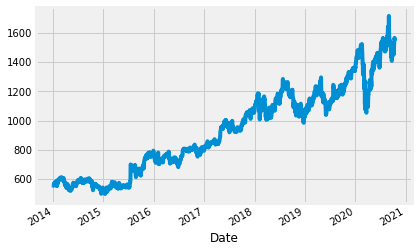

In [55]:
close.plot()
plt.show()

In [56]:
sma50 = close.rolling(window=50).mean()
sma50

Date
2014-01-02            NaN
2014-01-03            NaN
2014-01-06            NaN
2014-01-07            NaN
2014-01-08            NaN
                 ...     
2020-10-12    1521.638398
2020-10-13    1523.324597
2020-10-14    1525.127395
2020-10-15    1526.654995
2020-10-16    1527.909995
Name: Adj Close, Length: 1711, dtype: float64

In [57]:
plt.style.use('fivethirtyeight')

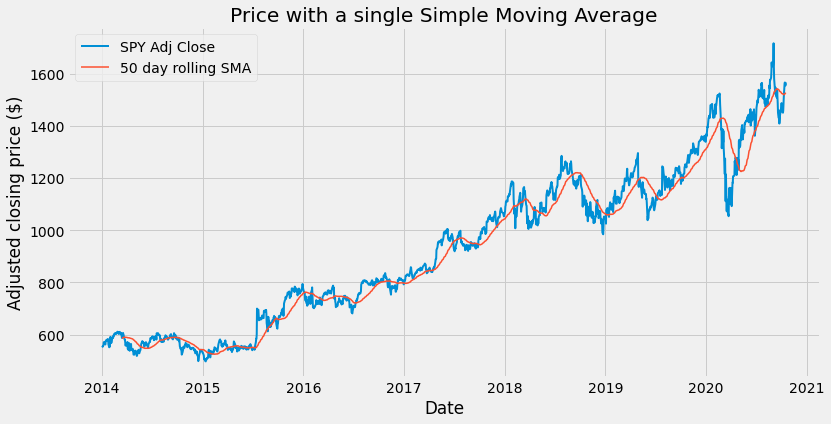

In [58]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

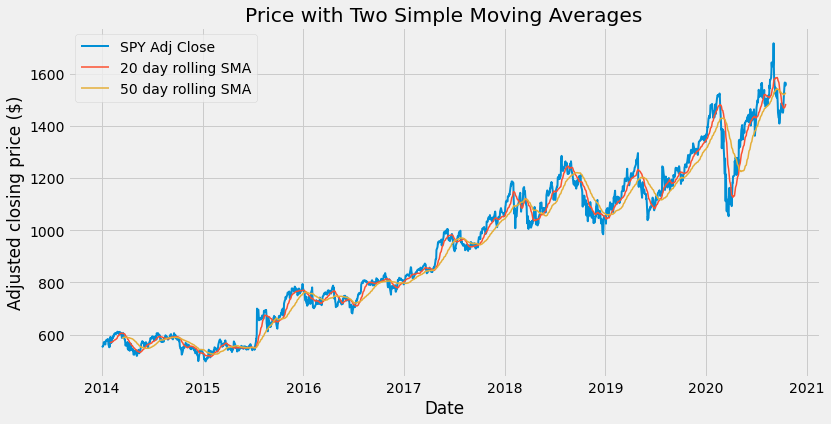

In [59]:
sma20 = close.rolling(window=20).mean()
plt.figure(figsize = (12,6))
#Plotting price with two SMAs:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma20, label='20 day rolling SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages')
plt.legend()
plt.show()

In [60]:
priceSma_df = pd.DataFrame({
      'Adj Close' : close,
      'SMA 20' : sma20,
      'SMA 50' : sma50
     })
priceSma_df

,Adj Close,SMA 20,SMA 50
Date,,,
2014-01-02,557.117126,NaN,NaN
2014-01-03,553.053040,NaN,NaN
2014-01-06,559.219238,NaN,NaN
2014-01-07,570.000000,NaN,NaN
2014-01-08,571.186157,NaN,NaN
...,...,...,...
2020-10-12,1564.589966,1471.592499,1521.638398
2020-10-13,1567.069946,1473.189996,1523.324597
2020-10-14,1563.439941,1475.757495,1525.127395


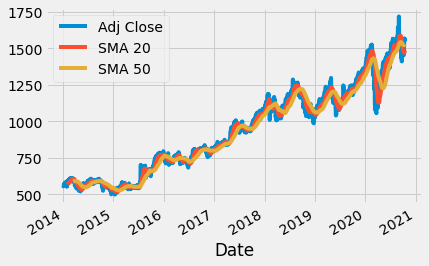

In [61]:
priceSma_df.plot()
plt.show()

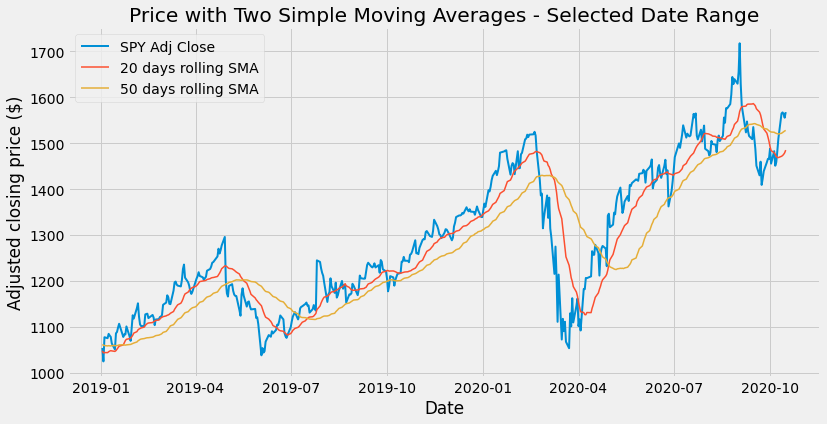

In [62]:
plt.figure(figsize = (12,6))
#Plotting price and two SMAs with a specified date range:
plt.plot(priceSma_df['2019':'2020']['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df['2019':'2020']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2019':'2020']['SMA 50'], label='50 days rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages - Selected Date Range')
plt.legend()
plt.show()

In [63]:
sma200 = close.rolling(window=200).mean()
priceSma_df['SMA 200'] = sma200
priceSma_df

,Adj Close,SMA 20,SMA 50,SMA 200
Date,,,,
2014-01-02,557.117126,NaN,NaN,NaN
2014-01-03,553.053040,NaN,NaN,NaN
2014-01-06,559.219238,NaN,NaN,NaN
2014-01-07,570.000000,NaN,NaN,NaN
2014-01-08,571.186157,NaN,NaN,NaN
...,...,...,...,...
2020-10-12,1564.589966,1471.592499,1521.638398,1412.171303
2020-10-13,1567.069946,1473.189996,1523.324597,1413.233453
2020-10-14,1563.439941,1475.757495,1525.127395,1414.352103


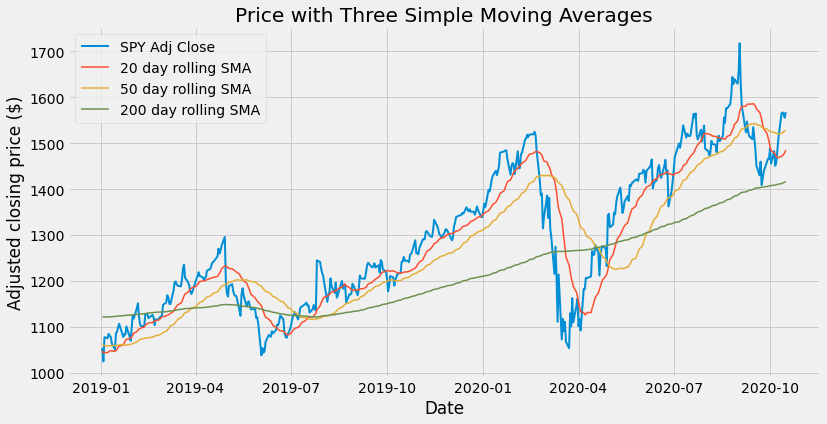

In [64]:
#Our start and end dates:
start = '2019'
end = '2020'
plt.figure(figsize = (12,6))
#Plotting price and three SMAs with start and end dates:
plt.plot(priceSma_df[start:end]['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df[start:end]['SMA 20'], label='20 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 50'], label='50 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 200'], label='200 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Three Simple Moving Averages')
plt.legend()
plt.show()
